## Пример того, как работает ЦПТ

## Задание
1. Придумать любую свою форму распределения. Можно в виде котика 😺
2. Рассчитать 95% доверительный интервал выборочного среднего методом Стьюдента
3. Определить, для какого процента экспериментов из 1 млн истинное 𝝁 не попадает в ДИ
4. Отличается ли это число от 5% и почему?



In [27]:
from scipy.stats import lognorm, t
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from random import choices

In [20]:
stddev = 0.5
mean = 5
dist=lognorm([stddev],loc=mean)
def ramp(x):
   return 0.5*(dist.pdf(x)+dist.pdf(xmax-x))
  
def roof(x):
  if 7<x<=10:
    return 13-x
  elif 4.0<x<=5.5:
    return 6.2
  elif 0<=x<=7:
    return 0.5*x+2.5

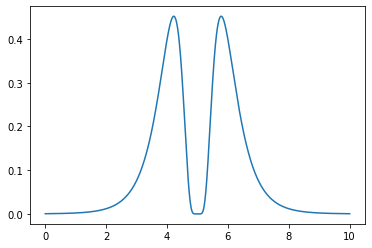

In [44]:
xmax=10
x=np.linspace(0,xmax,1000)
yramp=ramp(x) 
pl.plot(x,yramp)

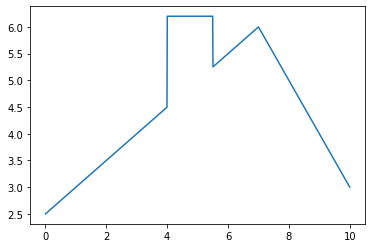

In [22]:
yroof=[roof(x1) for x1 in x]
pl.plot(x,yroof)

In [5]:
nElements=30
nsamples = 10**6

5.00016628028028 0.2332331792329346


(array([1.20000e+01, 7.30000e+01, 4.21000e+02, 2.31900e+03, 8.21200e+03,
        2.45090e+04, 5.78350e+04, 1.08396e+05, 1.60397e+05, 1.89278e+05,
        1.78665e+05, 1.33252e+05, 7.96570e+04, 3.75600e+04, 1.41590e+04,
        4.10500e+03, 9.36000e+02, 1.83000e+02, 2.70000e+01, 4.00000e+00]),
 array([3.90256924, 4.01536537, 4.12816149, 4.24095762, 4.35375375,
        4.46654988, 4.57934601, 4.69214214, 4.80493827, 4.9177344 ,
        5.03053053, 5.14332666, 5.25612279, 5.36891892, 5.48171505,
        5.59451118, 5.70730731, 5.82010344, 5.93289957, 6.0456957 ,
        6.15849183]),
 <a list of 20 Patch objects>)

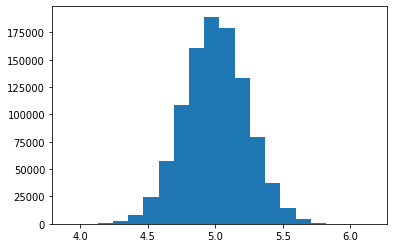

In [26]:
d_ramp=[np.mean(choices(x, yramp, k=nElements)) for i in range(nsamples)] 
print(np.mean(d_ramp),np.std(d_ramp, ddof=0))
plt.hist(d_ramp, bins=20)

5.309865259259259 0.4718665976870768


(array([7.00000e+00, 6.00000e+01, 3.18000e+02, 1.55300e+03, 5.84700e+03,
        1.76420e+04, 4.36140e+04, 8.59060e+04, 1.36447e+05, 1.76560e+05,
        1.83629e+05, 1.53453e+05, 1.04011e+05, 5.61840e+04, 2.40710e+04,
        8.11400e+03, 2.12000e+03, 4.04000e+02, 5.60000e+01, 4.00000e+00]),
 array([3.05238572, 3.27449116, 3.4965966 , 3.71870204, 3.94080747,
        4.16291291, 4.38501835, 4.60712379, 4.82922923, 5.05133467,
        5.27344011, 5.49554555, 5.71765098, 5.93975642, 6.16186186,
        6.3839673 , 6.60607274, 6.82817818, 7.05028362, 7.27238906,
        7.49449449]),
 <a list of 20 Patch objects>)

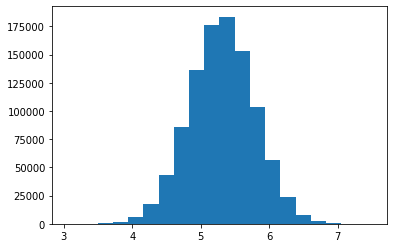

In [28]:
d_roof=[np.mean(choices(x, yroof, k=nElements)) for i in range(nsamples)]
print(np.mean(d_roof),np.std(d_roof, ddof=0))
plt.hist(d_roof, bins=20)

Рассчитать 95% доверительный интервал выборочного среднего методом Стьюдента

In [40]:
t_value = t.ppf(1-0.05/2, 29)
print(t_value)

2.045229642132703


In [41]:
x1 = np.mean(d_ramp)-t_value
x2 = np.mean(d_ramp)+t_value
print(f"Доверительный интервал: ({x1}, {x2})")

Доверительный интервал: (2.954936638147577, 7.0453959224129825)


Определить, для какого процента экспериментов из 1 млн истинное 𝝁 не попадает в ДИ

In [45]:
count_value = 0

for _ in range(nsamples):
  ramp = choices(x, yramp, k=nElements)
  mean_ramp = np.mean(ramp)
  if (mean < (mean_ramp - t_value)) or (mean > (mean_ramp + t_value)):
    count_value += 1

In [46]:
print(count_value)

0


Отличается ли это число от 5% и почему?

Отличается, потому что исходное распределение не является нормальным.